# Example ADCP

### Platform:
  __Endurance Array__:
* CE01ISSM, CE01ISSP, CE02SHSM, CE02SHBP, CE02SHSP, CE04OSSM, CE04OSBP, CE06ISSM, CE06ISSP, CE07SHSM, CE07SHSP, CE09OSSM, CE09OSPM
* CEGL386, CEGL384, CEGL383, CEGL382, CEGL381, CEGL327, CEGL326, CEGL320, CEGL319, CEGL312, CEGL311, CEGL247
	
__Pioneer Array__:
* CP01CNPM, CP01CNSM, CP02PMCI, CP02PMCO, CP02PMUI, CP02PMUO, CP03ISPM, CP03ISSM, CP04OSPM, CP04OSSM
* CPGL335, CPGL336, CPGL339, CPGL340, CPGL374, CPGL375, CPGL376, CPGL379, CPGL380, CPGL387, CPGL388, CPGL389, CPGL514
### Node:
* BUOY, NSIF, MFN, BEP, PROFILER, GLIDER
### Instrument Class:
* ADCP, CTD, DOSTA, FDCHP, FLORT, METBK1, METBK2, METBK1-hr, METBK2-hr, MOPAK, NUTNR, OPTAA, PARAD, PCO2A, PCO2W, PHSEN, PRESF, SPKIR, VEL3D, VELPT, ZPLSC
* WAVSS_Stats, WAVSS_MeanDir, WAVSS_NonDir, WAVSS_Motion, WAVSS_Fourier
### Method:
* Telemetered, RecoveredHost, RecoveredInst, RecoveredCSPP, RecoveredWFP, Streamed

### Load the access credentials

In [8]:
try
    load('ooinet.credentials.mat')  % returns a variable called options
catch
    error(['Unable to load access credentials. Users need to create a ' ...
           'weboptions object with their personal OOINet API keys. See ' ...
           'README for more information on how to create this.'])
end 

### Set time period of interest

In [9]:
start_date='2017-08-01T00:00:00.000Z';
end_date='2017-10-30T23:59:59.000Z';

### Specify metadata

In [10]:
platform_name = 'CE09OSSM';
node = 'NSIF';
instrument_class = 'ADCP';
method = 'RecoveredInst';

### Get M2M URL

In [11]:
[uframe_dataset_name,variables] = M2M_URLs(platform_name,node,instrument_class,method);

### Make M2M Call

In [12]:
[nclist] = M2M_Call(uframe_dataset_name,start_date,end_date,options);

M2M REQUEST MADE, not yet completed:
10 20 30 40 50 60 70 80 done
uframe_m2m_status: request complete
uframe_m2m_status: successful
THREDDS Catalog URL:
https://opendap.oceanobservatories.org/thredds/catalog/ooi/joffrey.peters@whoi.edu/20250513T140215822Z-CE09OSSM-RID26-01-ADCPTC000-recovered_inst-adcp_velocity_earth/catalog.html
 


### Get Data

In [13]:
%[adcp_variables, adcp_mtime, netcdfFilenames] = M2M_Data(variables, nclist, false);   %This will download .nc file(s) and read in the data from the local files
[adcp_variables, adcp_mtime, netcdfFilenames] = M2M_Data(variables, nclist);  %This will use the opendap to read in the data from remote files

## Example ADCP plots
### Plot W/E and Plot N/S

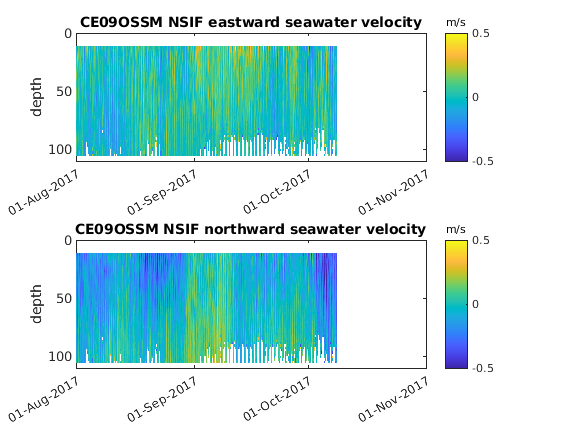

In [14]:
subplot(211)
pcolor(adcp_mtime,squeeze(adcp_variables(2).data(:,1)),adcp_variables(6).data)
shading flat
datetick('x',1)
caxis([-.5 .5])
c=colorbar;
title(c,adcp_variables(6).units)
set(gca, 'YDir','reverse')
ylabel('depth')
ylim([0 110])
title([platform_name ' ' node ' ' strrep(adcp_variables(6).name,'_',' ')])
subplot(212)
pcolor(adcp_mtime,squeeze(adcp_variables(2).data(:,1)),adcp_variables(7).data)
shading flat
datetick('x',1)
caxis([-.5 .5])
c=colorbar;
title(c,adcp_variables(7).units)
set(gca, 'YDir','reverse')
ylabel('depth')
ylim([0 110])
title([platform_name ' ' node ' ' strrep(adcp_variables(7).name,'_',' ')])